In [1]:
#Import packages:
import numpy as np
import pandas as pd
from astropy.io import fits
from astropy.table import Table
import matplotlib.pyplot as plt
from astroquery.mast import Mast
from astroquery.mast import Observations
from ginga.util.zscale import zscale

### Image rootnames chosen for each of the exercises:

* Exercise 1:
    * (i) 'iemg11s5q'
    * (ii) 'iem406a5q'
    * (iii) 'idxr01z3q'
* Exercise 2: 'ie8d01neq'

In [18]:

def stat_plot(data_raw, data_flt, data_DQ, data_ERR, root, dq_flag=16):
    # Inputs: data - list of the arrays in the order: [flt SCI, raw, ERR, DQ]
    # flag: value to flag in DQ array
    # root: string with the rootname of the image
    # Calculate summary statistics from the SCI array:
    flt_stat = [root, np.mean(data_flt), np.median(data_flt), np.amin(data_flt),
                np.amax(data_flt), np.std(data_flt)]

    # Calculate the scaling for the arrays:
    vmin_flt, vmax_flt = zscale(data_flt)
    vmin_raw, vmax_raw = zscale(data_raw)
    vmin_ERR, vmax_ERR = zscale(data_ERR)

    # Filter of the DQ array
    DQ_scale = np.bitwise_and(data_DQ,dq_flag)
    
    # Create the plot of the arrays
    fig, axs = plt.subplots(2,2, figsize=[20,20], constrained_layout=True)
    fig.suptitle(f'Image rootname: {root}', fontsize=25)
    
    axs[0,0].set_title('flt: SCI array', fontsize=20)
    PlotA = axs[0,0].imshow(data_flt, vmin=vmin_flt, vmax=vmax_flt, cmap='gray', origin='lower')
    fig.colorbar(PlotA, ax = axs[0,0], shrink=0.8)

    axs[0,1].set_title('raw: SCI array',fontsize=20)
    PlotB = axs[0,1].imshow(data_raw, vmin=vmin_raw, vmax=vmax_raw, cmap='gray', origin='lower')
    fig.colorbar(PlotB, ax = axs[0,1], shrink=0.8)

    axs[1,0].set_title("Error array",fontsize=20)
    PlotC = axs[1,0].imshow(data_ERR, vmin=vmin_ERR,vmax=vmax_ERR, cmap='gray', origin='lower')
    fig.colorbar(PlotC, ax = axs[1,0], shrink=0.8)

    axs[1,1].set_title("Data Quality array",fontsize=20)
    PlotD = axs[1,1].imshow(DQ_scale, cmap='gray', origin='lower')
    fig.colorbar(PlotD, ax = axs[1,1], shrink=0.8)

    # Create the histogram:
    plt.figure()
    plt.title(f'Histogram of {root}')
    plt.xlabel('Pixel intensity')
    plt.yscale('log')
    plt.hist(data_flt.flatten(), bins = 300, range=(vmin_flt, vmax_flt))

    
    return(flt_stat)

In [3]:
root4 = 'ie8d01neq'
    # Query data files
Ex4_table = Observations.query_criteria(obs_id= 'ie8d01neq')
Ex4_Prods = Observations.get_product_list(Ex4_table)
Ex4Prod = Observations.filter_products(Ex4_Prods, extension=["_flt.fits", "_raw.fits"])
Ex4Prod

obsID,obs_collection,dataproduct_type,obs_id,description,type,dataURI,productType,productGroupDescription,productSubGroupDescription,productDocumentationURL,project,prvversion,proposal_id,productFilename,size,parent_obsid,dataRights,calib_level
str8,str3,str5,str9,str64,str1,str40,str9,str28,str8,str1,str6,str19,str5,str23,int64,str8,str6,int64
26281529,HST,image,ie8d01neq,DADS RAW file - Raw exposure COS/NICMOS/STIS/WFC3/ACS,S,mast:HST/product/ie8d01neq_raw.fits,SCIENCE,--,RAW,--,CALWF3,--,16053,ie8d01neq_raw.fits,8527680,26281529,PUBLIC,1
26281529,HST,image,ie8d01neq,DADS FLT file - Calibrated exposure ACS/WFC3/STIS/COS,S,mast:HST/product/ie8d01neq_flt.fits,SCIENCE,Minimum Recommended Products,FLT,--,CALWF3,3.6.2 (May-27-2021),16053,ie8d01neq_flt.fits,42203520,26281529,PUBLIC,2


In [4]:
    # Download data files:
Observations.download_products(Ex4Prod, mrp_only=False, cache=False)

#Retrieve data from the files and separate them:

            #flt file data: (SCI array)
Ex4_flt = fits.getdata('mastDownload/HST/ie8d01neq/ie8d01neq_flt.fits', 'sci', 1)

            #Raw file data: (SCI array)
Ex4_raw = fits.getdata('mastDownload/HST/ie8d01neq/ie8d01neq_raw.fits', 'sci', 1)

            #Get the error array from flt
Ex4_ERR = fits.getdata('mastDownload/HST/ie8d01neq/ie8d01neq_flt.fits','ERR',1)

            #Get the DQ array from the flt file
Ex4_DQ = fits.getdata('mastDownload/HST/ie8d01neq/ie8d01neq_flt.fits','DQ',1)


['ie8d01neq', 7007.301856250737, 2645.0, 2565, 39565, 8117.780941319839]

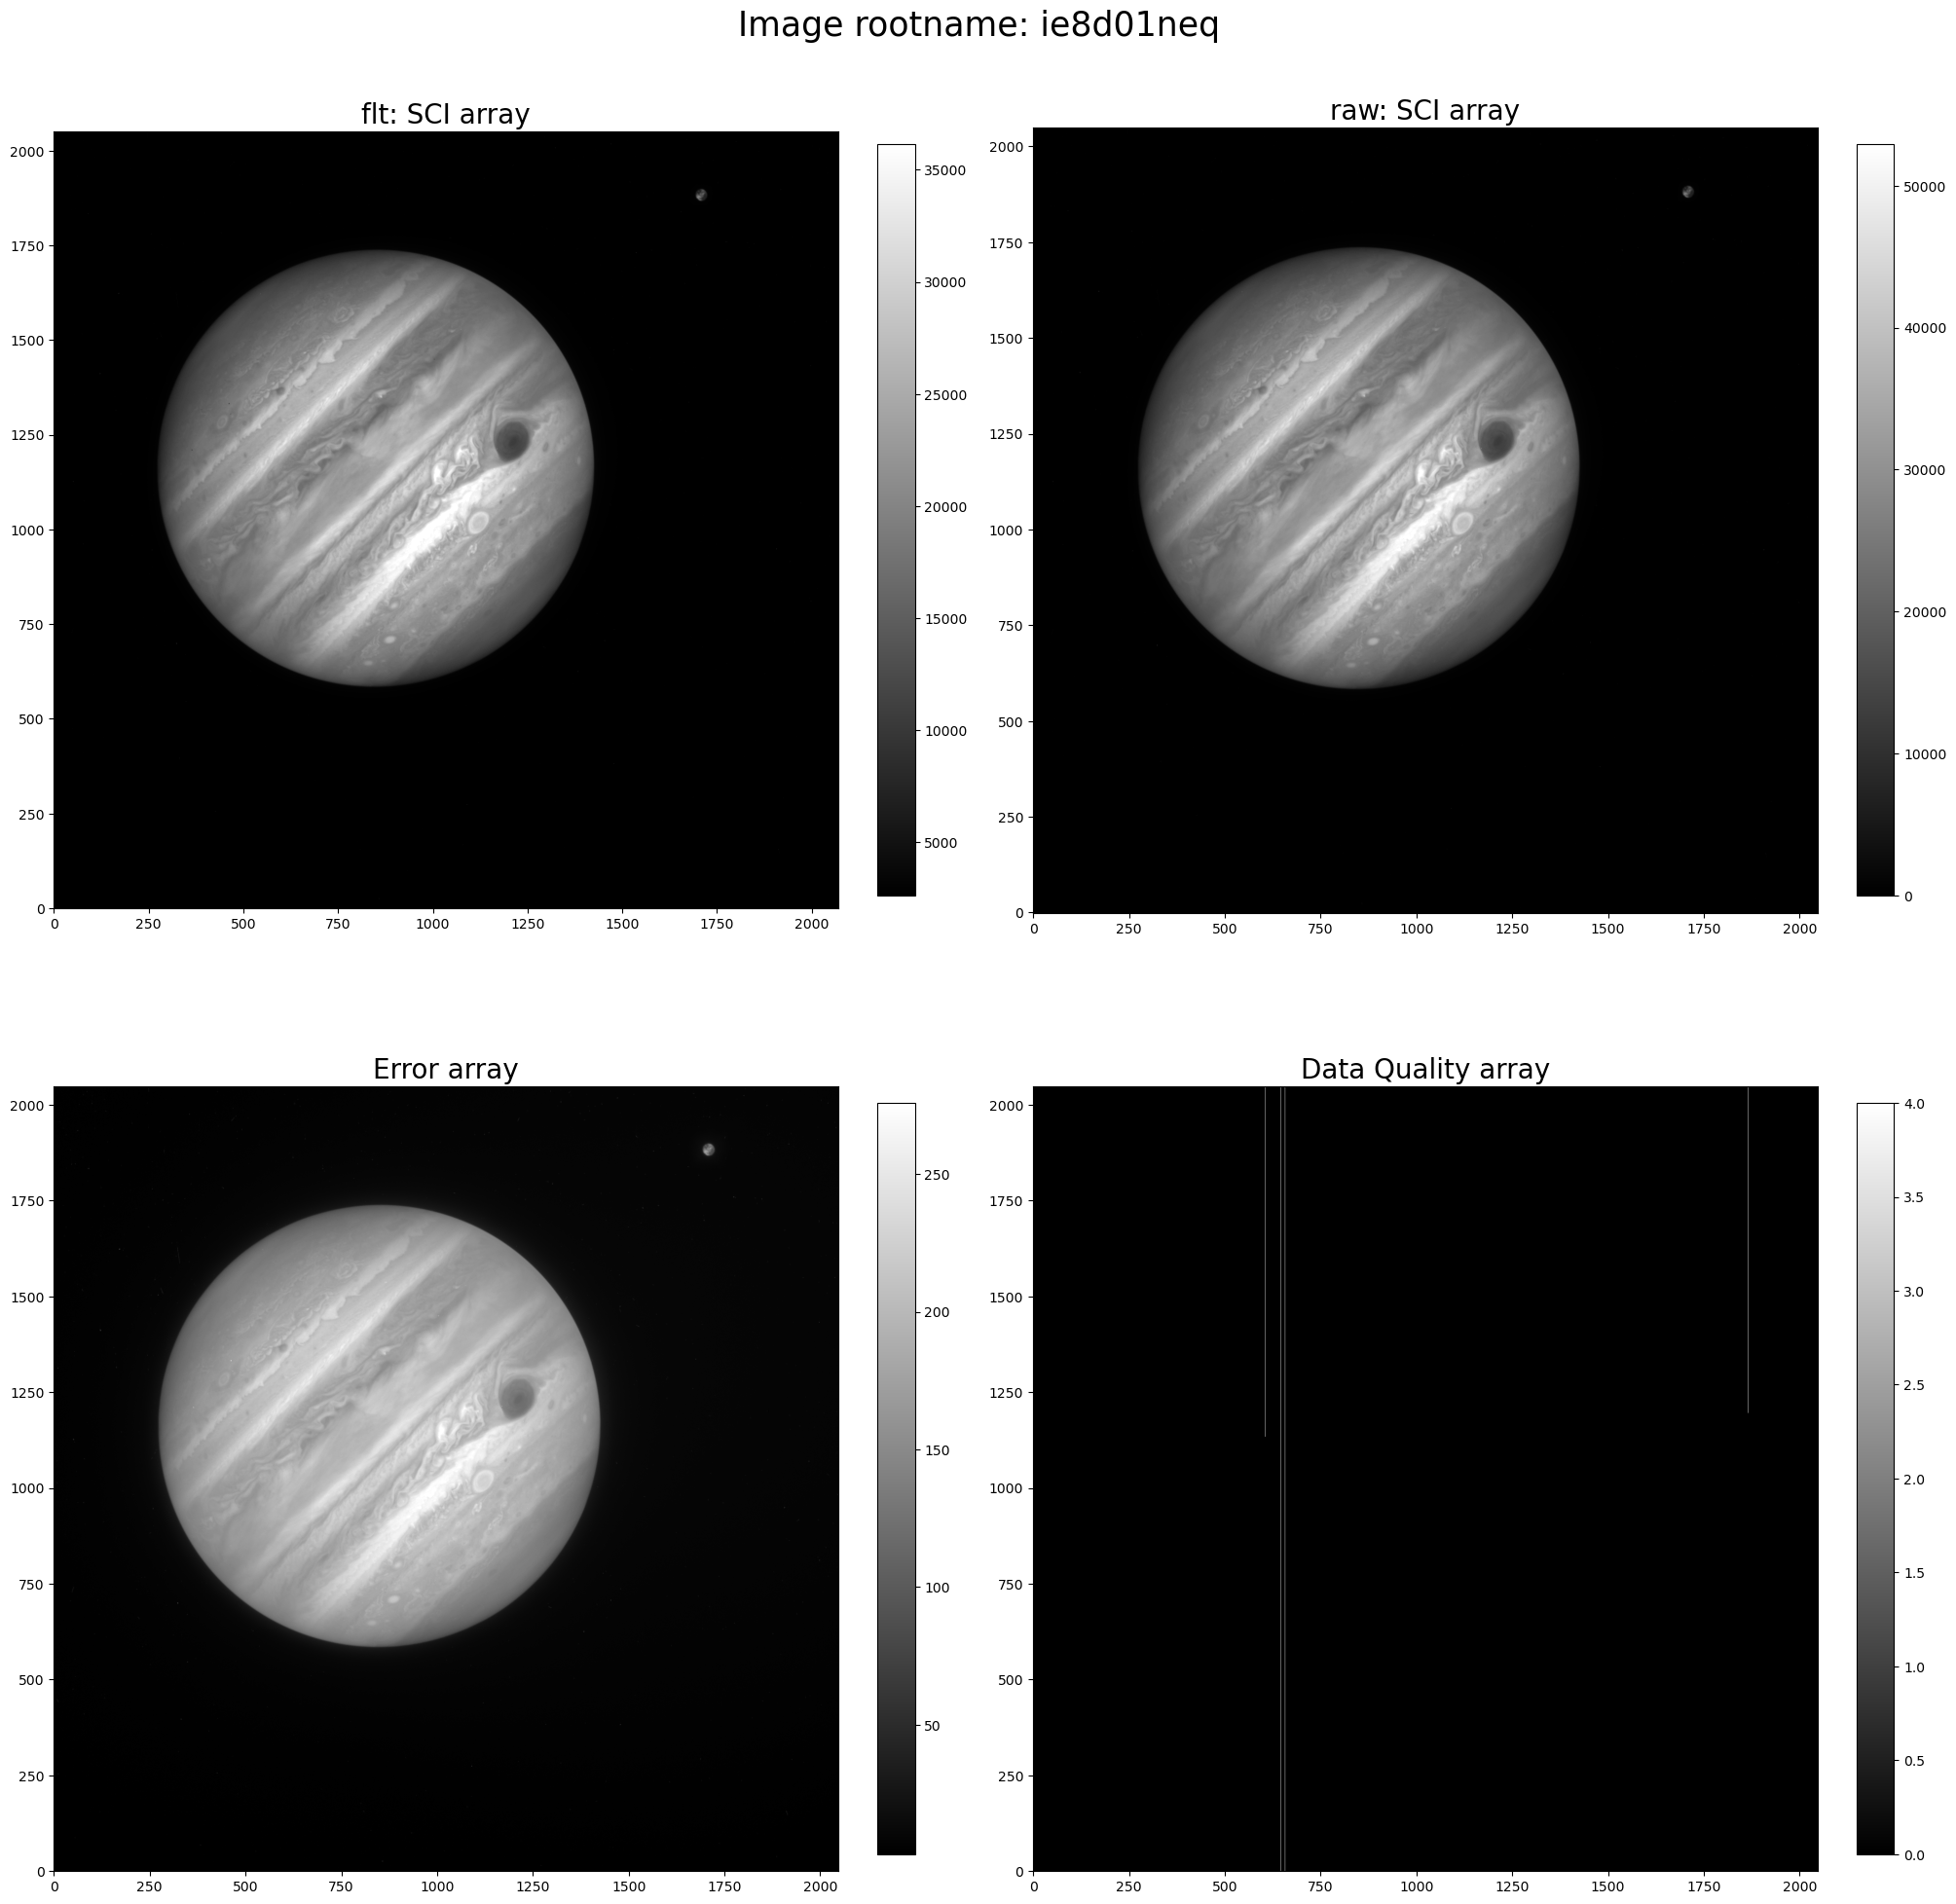

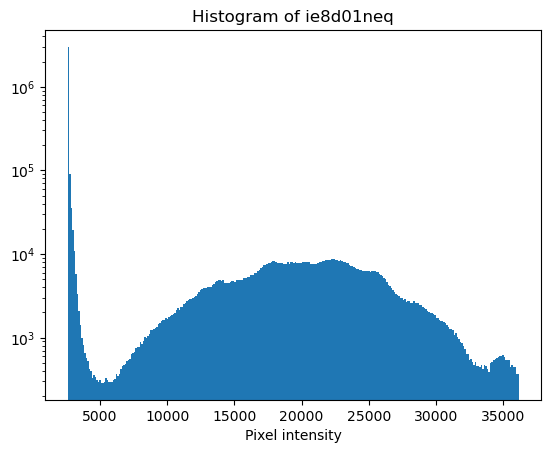

In [19]:
# Call function:
Ex4_stats = stat_plot(Ex4_flt, Ex4_raw, Ex4_DQ, Ex4_ERR, root4)

Ex4_stats
